# Data Exploration and Analysis
## Bank Marketing Dataset

This notebook explores the Bank Marketing dataset and prepares it for model training.

**Dataset:** Bank Marketing (UCI ML Repository)  
**Problem:** Predict if a client will subscribe to a term deposit (binary classification)

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load the Dataset

Run the download script first to get the dataset:
```bash
python download_data.py
```

This will automatically download and prepare the Bank Marketing dataset.

In [3]:
# Load the dataset
df = pd.read_csv('../data/bank_marketing.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (41188, 21)

First few rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Step 2: Dataset Information

### Bank Marketing Dataset Features:
1. **age**: Client's age
2. **job**: Type of job (encoded)
3. **marital**: Marital status (encoded)
4. **education**: Education level (encoded)
5. **default**: Has credit in default? (encoded)
6. **balance**: Average yearly balance in euros
7. **housing**: Has housing loan? (encoded)
8. **loan**: Has personal loan? (encoded)
9. **contact**: Contact communication type (encoded)
10. **day**: Last contact day of the month
11. **month**: Last contact month of year (encoded)
12. **duration**: Last contact duration in seconds
13. **campaign**: Number of contacts during this campaign
14. **pdays**: Days since last contact from previous campaign
15. **previous**: Number of contacts before this campaign
16. **poutcome**: Outcome of previous marketing campaign (encoded)
17. **emp.var.rate**: Employment variation rate
18. **cons.price.idx**: Consumer price index
19. **cons.conf.idx**: Consumer confidence index
20. **euribor3m**: Euribor 3 month rate
21. **nr.employed**: Number of employees
22. **target**: Did client subscribe to term deposit? (0=no, 1=yes)

In [4]:
# Dataset information
print("Dataset Info:")
df.info()

print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

Duplicate Rows: 12


## Step 3: Target Variable Analysis

Target Variable Distribution:
target
0    36548
1     4640
Name: count, dtype: int64

Percentage:
target
0    88.734583
1    11.265417
Name: proportion, dtype: float64


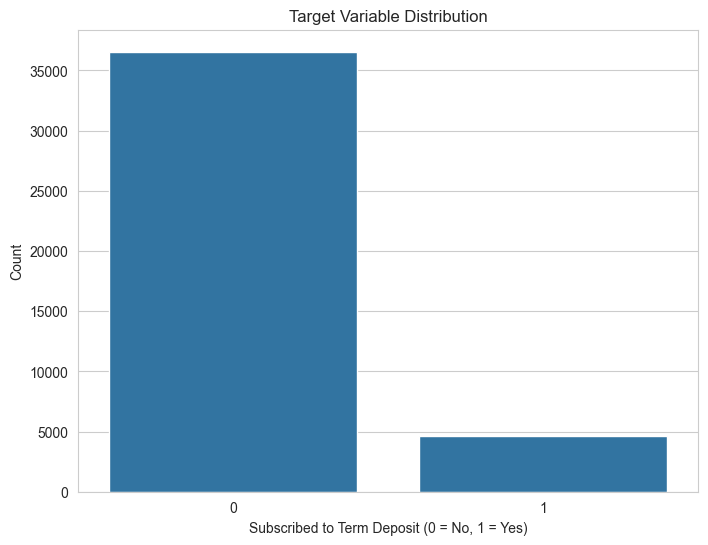

In [6]:
# Target variable distribution
print("Target Variable Distribution:")
print(df['target'].value_counts())
print("\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Target Variable Distribution')
plt.xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Step 4: Exploratory Data Analysis (EDA)

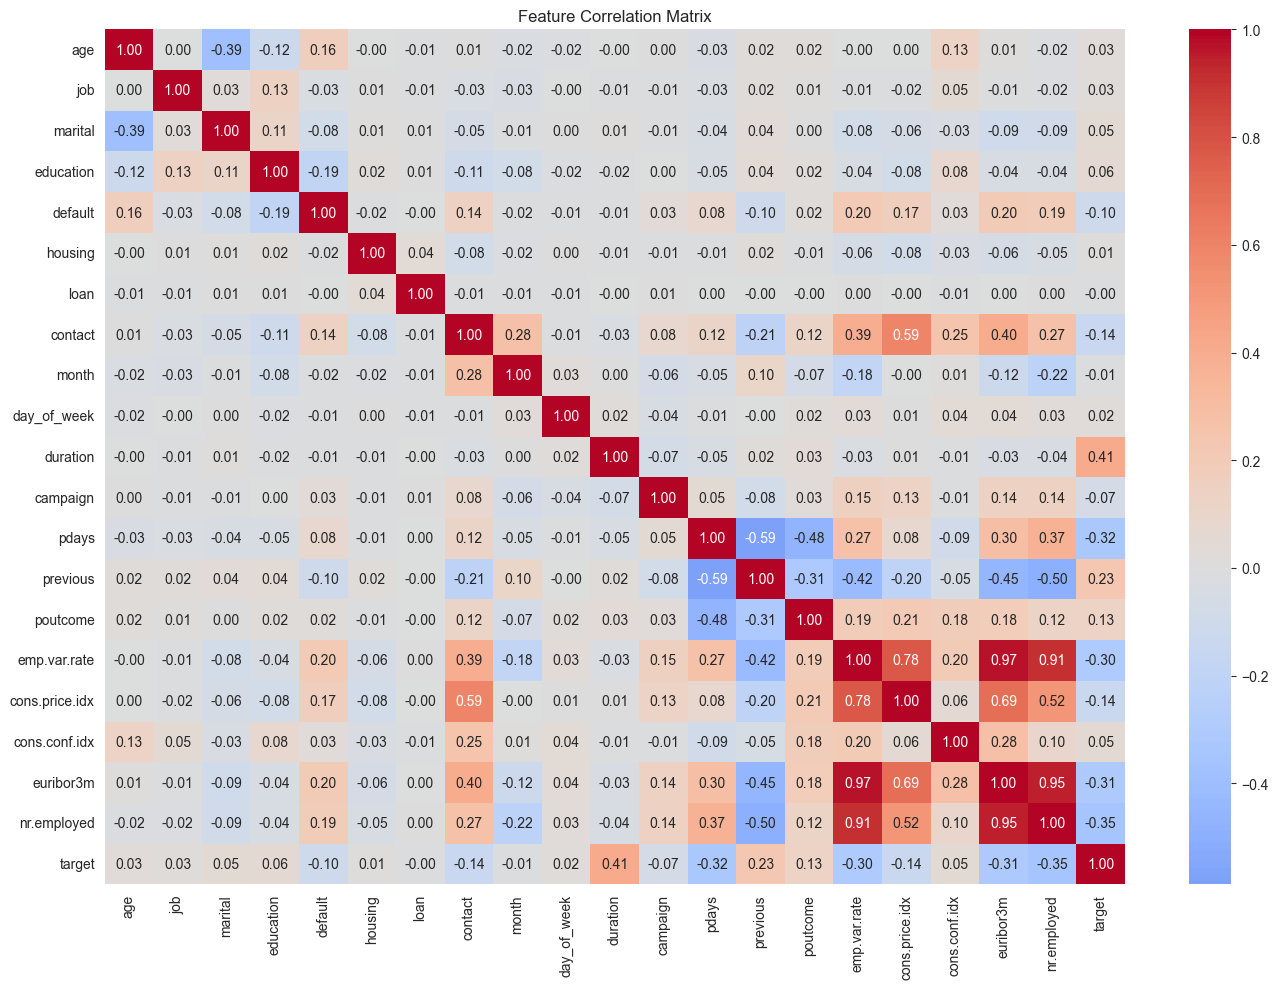

In [7]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

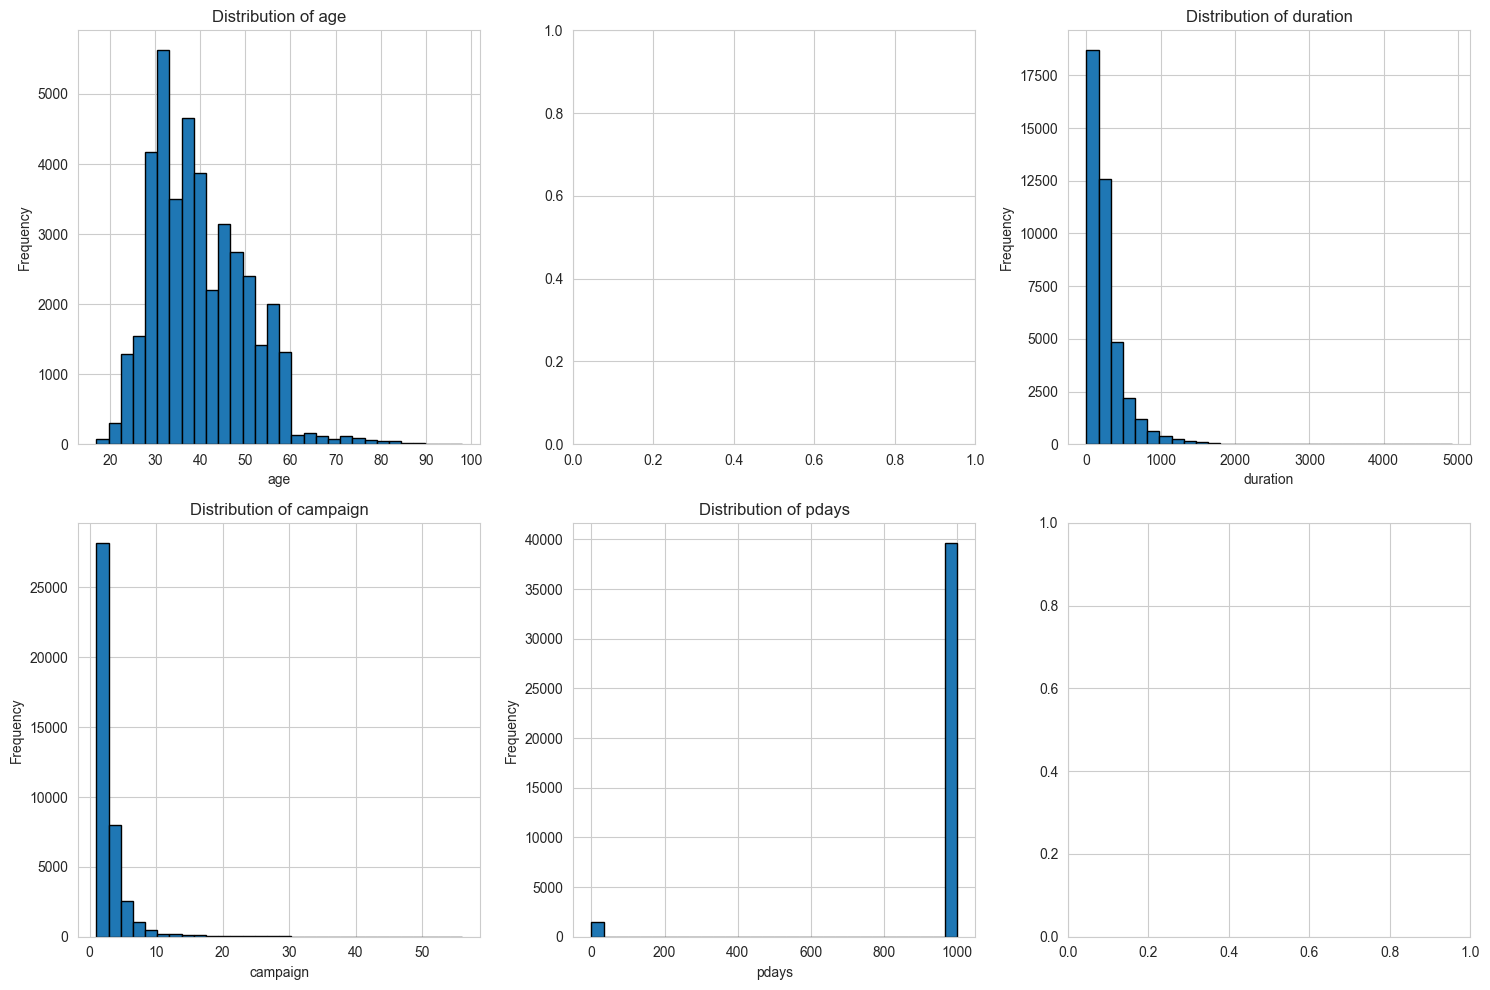

In [8]:
# Distribution of key numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    if feature in df.columns:
        axes[idx].hist(df[feature], bins=30, edgecolor='black')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

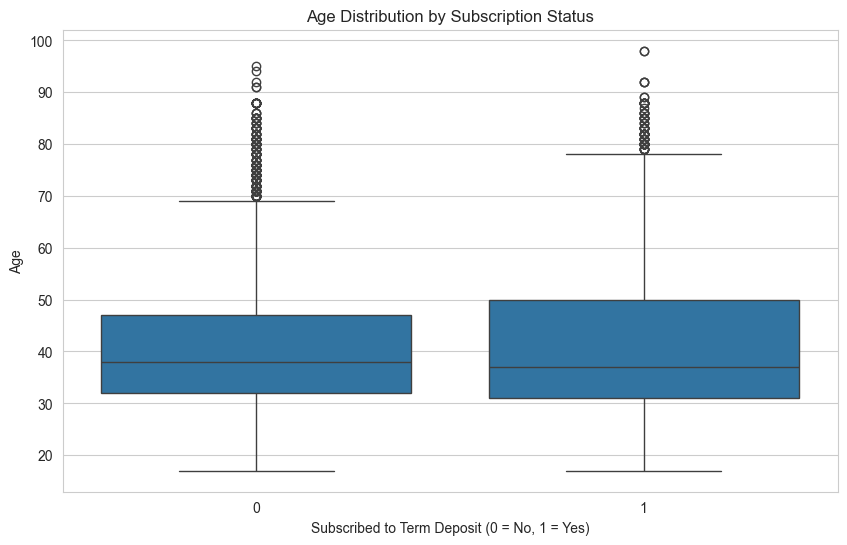

In [9]:
# Age distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

## Step 5: Data Preparation for Modeling

In [10]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Features shape: (41188, 20)
Target shape: (41188,)

Training set size: 32950
Test set size: 8238


In [12]:
# Save processed data for model training
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

print("Data saved successfully!")

Data saved successfully!


## Summary
1. Dataset has **21 features** (meets minimum requirement of 12)
2. Target variable distribution analyzed
3. Several features show correlation with subscription outcome
4. Data is ready for model training